# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore') 

### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [23]:
df = pd.read_csv('/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize



### 2. Dealing with the data

Already done in the round 2.



In [22]:
# 2 Standardize header names.
    #low cases
df.columns = df.columns.str.lower()
    
    #replace space with _
df_columns = []
for col in df.columns:
    col_ = col.replace(' ', '_')
    df_columns.append(col_)
df.columns = df_columns
df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [5]:
# 3.2.- Data cleaning
        # - Data Types
df.dtypes
        # - Missing data, check null values
df.isnull().sum() #--> no null values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [13]:
num = df.select_dtypes(include=np.number)
num.describe().T


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


customer_lifetime_value


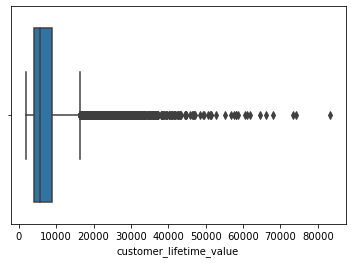

income


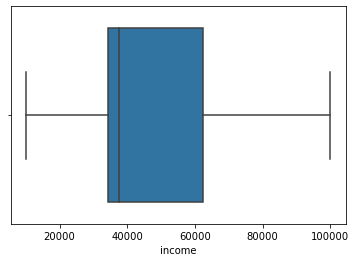

monthly_premium_auto


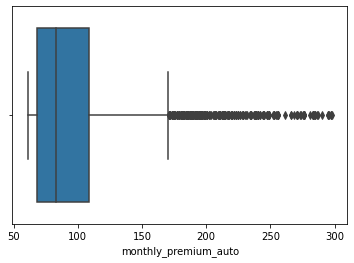

months_since_last_claim


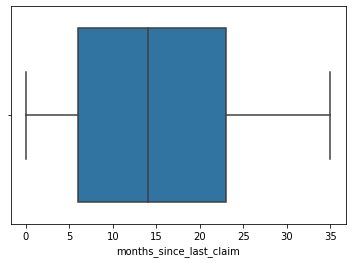

months_since_policy_inception


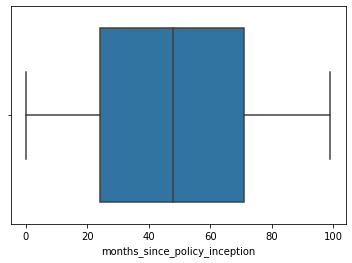

number_of_open_complaints


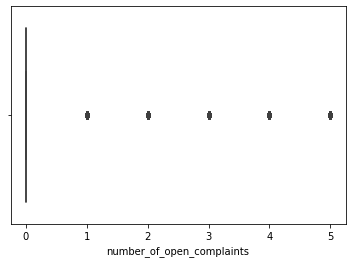

number_of_policies


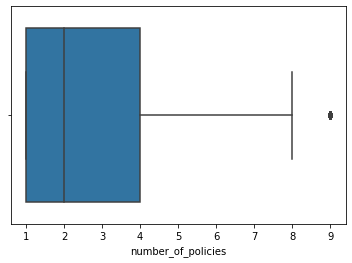

total_claim_amount


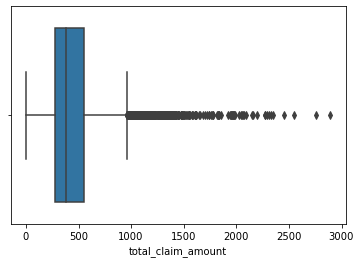

In [45]:
        # - Outliers in numerical df
columns = num.columns
for col in columns:
    sns.boxplot(x=num[col])
    print(col)
    plt.show()

In [49]:
# columns with lots of outliers:
    # customer_lifetime_value
upper = np.percentile(num['customer_lifetime_value'],75)
lower = np.percentile(num['customer_lifetime_value'],25)
iqr = upper - lower
upper_limit = upper + (1.5 * iqr)
lower_limit = lower - (1.5 * iqr)
num = num[(num['customer_lifetime_value']>lower_limit) & (num['customer_lifetime_value']<upper_limit)]
    # monthly_premium_auto
upper = np.percentile(num['monthly_premium_auto'],75)
lower = np.percentile(num['monthly_premium_auto'],25)
iqr = upper - lower
upper_limit = upper + (1.5 * iqr)
lower_limit = lower - (1.5 * iqr)
num = num[(num['monthly_premium_auto']>lower_limit) & (num['monthly_premium_auto']<upper_limit)]

    # total_claim_amount
upper = np.percentile(num['total_claim_amount'],75)
lower = np.percentile(num['total_claim_amount'],25)
iqr = upper - lower
upper_limit = upper + (1.5 * iqr)
lower_limit = lower - (1.5 * iqr)
num = num[(num['total_claim_amount']>lower_limit) & (num['total_claim_amount']<upper_limit)]

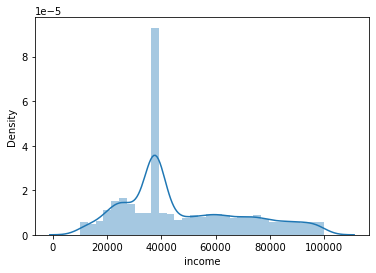

In [50]:
        # income has lots of 0 --> replace them with mean
income_mean = num['income'].mean()
num['income'] = num['income'].replace([0], income_mean)

sns.distplot(num['income'])
plt.show()

In [51]:
cat = df.select_dtypes(include=np.object)
print(cat.shape)
cat.head(3)

(9134, 16)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


In [52]:
        # - Duplicate data
cat = cat.drop_duplicates()
print(cat.shape)

(9134, 16)


In [54]:
# 3.3.- Feature selection (Which variables are important to answer our questions?)
    # - Feature and Target Variables
y = num['total_claim_amount']
X = num.drop(['total_claim_amount'], axis=1)

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     402.4
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:04:30   Log-Likelihood:                -50111.
No. Observations:                7640   AIC:                         1.002e+05
Df Residuals:                    7632   BIC:                         1.003e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

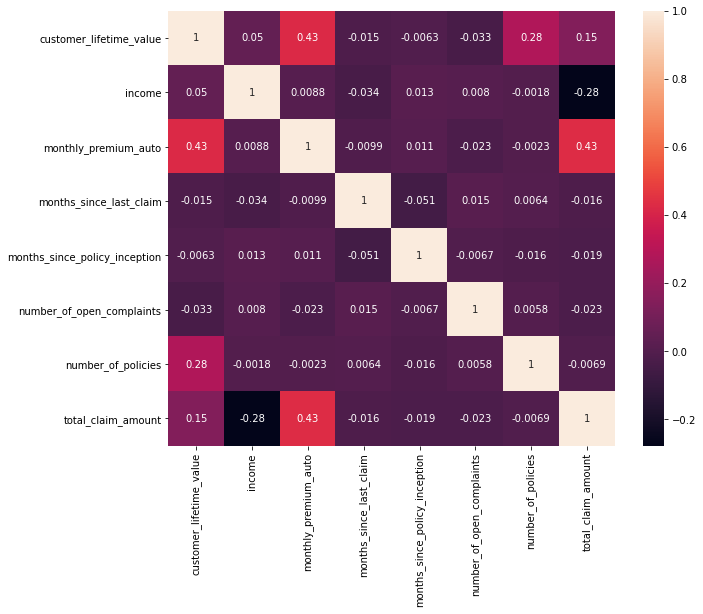

In [55]:
# check the correlations
#mask = np.zeros_like(num.corr())

#mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(num.corr(), annot=True)
plt.show()

In [56]:
# we remove the feature with the most correlation but the R Square drops significatively
y = num['total_claim_amount']
X = num.drop(['total_claim_amount', 'monthly_premium_auto'], axis=1)

X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          1.07e-182
Time:                        20:04:38   Log-Likelihood:                -50880.
No. Observations:                7640   AIC:                         1.018e+05
Df Residuals:                    7633   BIC:                         1.018e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [57]:
# the R Square without removing outliers was greater than the R Square after removing them. In real life I would step back and skip that step.

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [68]:
# - Normalize (numerical).
num1 = num.copy()
def boxcox_transform(df):
    columns = num1.columns
    _ci = {column: None for column in columns}
    for col in columns:
        df[col] = np.where(df[col]<=0, np.NAN, df[col]) 
        transformed_data, ci = stats.boxcox(df[col])
        df[col] = transformed_data
        _ci[col] = [ci] 
    return df, _ci
num, _ci = boxcox_transform(num)
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,3.048125,45.954783,NaN,6.665644e+11,9.857695e+04,NaN,0.000000,112.746577
2,4.268654,44.284390,NaN,5.091506e+09,2.858566e+12,NaN,0.614109,150.933973
3,3.855835,41.402312,NaN,5.091506e+09,2.699326e+14,NaN,1.403109,143.527801
4,3.062454,43.075510,NaN,1.640504e+08,9.898317e+12,NaN,0.000000,51.747765
5,3.916620,47.291801,NaN,6.055632e+08,6.146307e+15,NaN,0.614109,57.734682
...,...,...,...,...,...,...,...,...
9128,3.361913,44.045700,NaN,1.877047e+09,1.028037e+14,NaN,0.000000,145.848853
9130,3.138696,35.751083,NaN,6.055632e+08,2.150436e+11,NaN,0.000000,111.502118
9131,3.907714,41.402312,NaN,1.433769e+07,2.280474e+12,1300.779707,0.614109,194.006221
9132,3.843165,35.899059,NaN,1.114049e+12,1.300780e+03,NaN,0.908930,175.327984


customer_lifetime_value


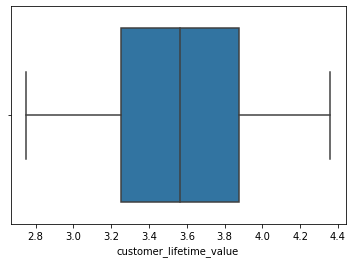

income


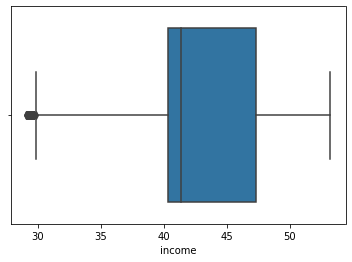

monthly_premium_auto


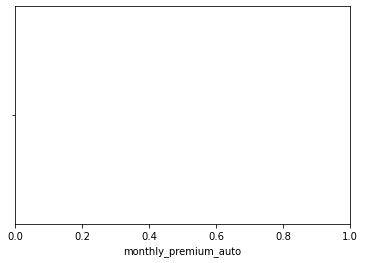

months_since_last_claim


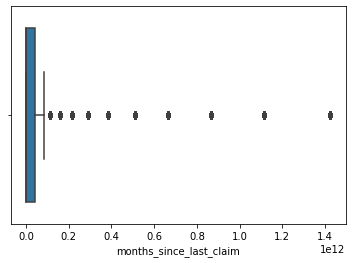

months_since_policy_inception


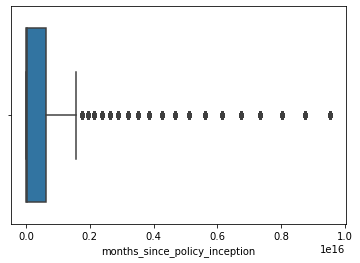

number_of_open_complaints


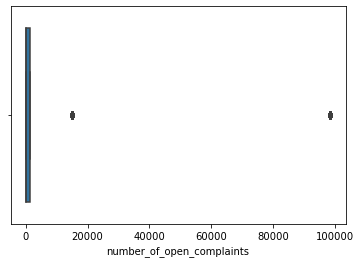

number_of_policies


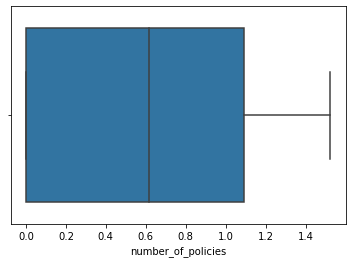

total_claim_amount


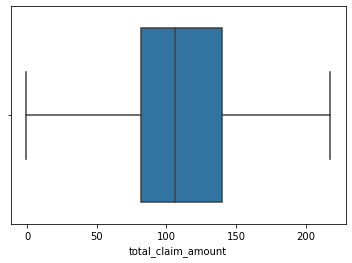

In [69]:
columns = num.columns
for col in columns:
    sns.boxplot(x=num[col])
    print(col)
    plt.show()

In [73]:
# - X-y split.
X = num.drop('total_claim_amount', axis=1)
y = num['total_claim_amount']

NameError: name 'train_test_split' is not defined